# Plot vapor pressures from the CRC handbook, download 220323.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

def p_sat(T1, T2, P1, H_vap):
    R=8.3145
    P2 = P1*np.exp((-H_vap/R*(1/T2-1/T1)))
    return P2

def get_H(T1, T2, P1, P2):
    R=8.3145
    H_vap = -np.log(P2/P1)*R/((1/T2-1/T1))
    return H_vap
    

In [2]:
dir = "../data/external/CHEMPHYSHB_T1/"
list_d = pd.DataFrame()
for file in os.listdir(dir):
    if 'csv' in file: 
        list_d = pd.concat([list_d, pd.read_csv(dir+'/'+file)])
a = ['Name', 'Mol. form.', 1,
       10, 100,
       1000, 10000,
       100000, 'Ref.', 'NaN']
list_d.columns = a
list_old = list_d = list_d.copy(deep=True)

for col in [1, 10, 100, 1000, 10000, 100000]:
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>e</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>d</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>c</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>b</sup>'))
    list_d[col] = list_d[col].astype('str').map(lambda x: x.lstrip('<').rstrip('<sup>a</sup>'))
    list_d[col] = list_d[col].astype('float')
list_d['hvap'] = get_H(list_d[1000]+273,list_d[100000]+273, 1000, 100000)
list_d['T 298 K (in Pa)'] = p_sat(list_d[10000]+273, 298, 10000, list_d['hvap'])
list_d['T 298 K (in log10 mBar)'] = list_d['T 298 K (in Pa)']/10**2

In [3]:
GeckoQ = pd.read_csv('../data/external/GeckoQ/Dataframe.csv')


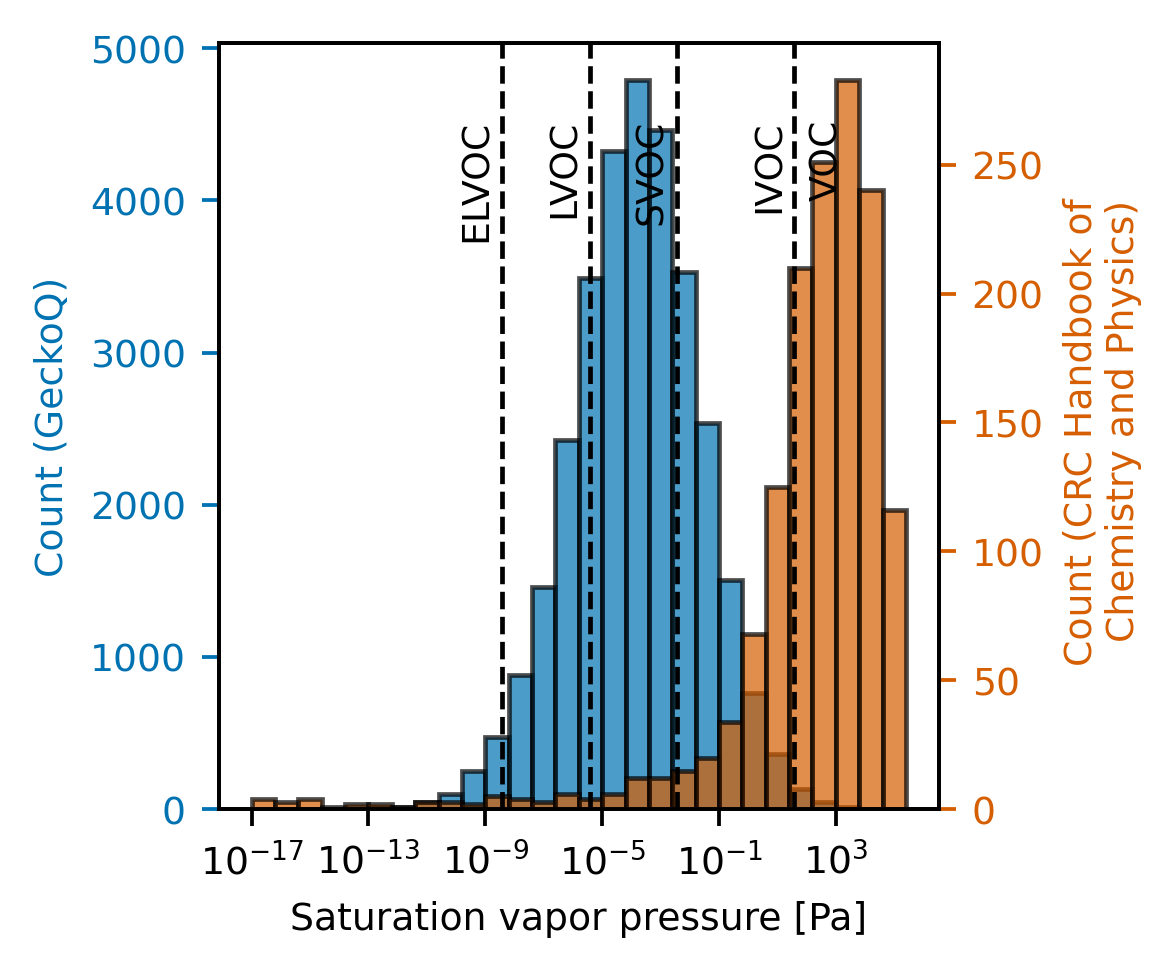

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
R = 0.0821  # L·atm·K^-1·mol^-1
T = 298     # K
molecular_weight = 200  # g/mol
atm_to_pa = 101325  # 1 atm to mbar

# Concentrations in micrograms per cubic meter
concentrations_mug_per_m3 = [0.0003, 0.3, 300, 3000000]

# Conversion steps
def concentration_to_pressure(concentration_mug_per_m3, molecular_weight, R, T, atm_to_mbar):
    concentration_g_per_m3 = concentration_mug_per_m3 * 1e-6
    concentration_mol_per_m3 = concentration_g_per_m3 / molecular_weight
    concentration_mol_per_L = concentration_mol_per_m3 * 1e-3
    pressure_atm = concentration_mol_per_L * R * T
    pressure_mbar = pressure_atm * atm_to_mbar
    return pressure_mbar

# Calculate pressures
pressures_pa = [concentration_to_pressure(c, molecular_weight, R, T, atm_to_pa) for c in concentrations_mug_per_m3]

# Convert pressures to log10 scale
log_pressures = np.log10(pressures_pa)

# Set colorblind-friendly palette
colorblind_palette = ['#D55E00', '#E69F00', '#009E73', '#56B4E9', '#0072B2', '#CC79A7', '#F0E442', '#000000']
sns.set_palette(colorblind_palette)
colors = colorblind_palette

fig, ax1 = plt.subplots(figsize=(3.5, 2.9), dpi=340)
plt.rc('font', size=8)
sns.set_palette(colors)

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the second histogram on the right y-axis with lower zorder
ax2.hist(np.log10(list_d['T 298 K (in Pa)']), bins=np.arange(-17, 6, 0.8), ec='k', color=colors[0], alpha=0.7, zorder=1)
ax2.set_ylabel('Count (CRC Handbook of \n Chemistry and Physics)', color=colors[0])
ax2.tick_params('y', colors=colors[0])

# Plot the first histogram on the left y-axis with higher zorder
ax1.hist(np.log10(GeckoQ['pSat_Pa']), bins=np.arange(-17, 6, 0.8), ec='k', color=colors[4], alpha=0.7, zorder=10)
ax1.set_xlabel('Saturation vapor pressure [Pa]')
ax1.set_ylabel('Count (GeckoQ)', color=colors[4])
ax1.tick_params('y', colors=colors[4])

# Add vertical lines for pressures and labels on ax2 (behind ax1)
labels = ['ELVOC', 'LVOC', 'SVOC', 'IVOC']
for i, pressure in enumerate(log_pressures):
    ax2.axvline(x=pressure, color='black', linestyle='--', linewidth=1, zorder=5)
    ax2.text(pressure - 1.5, ax2.get_ylim()[1] * 0.9, labels[i], color='black', verticalalignment='top', rotation=90, zorder=5)

# Add VOC label to the right of the last line on ax2
ax2.text(log_pressures[-1] + 0.5, ax2.get_ylim()[1] * 0.9, 'VOC', color='black', verticalalignment='top', rotation=90, zorder=5)

# Set x-axis ticks and labels
ax1.set_xticks(ticks=[-17, -13, -9, -5, -1, 3])
ax1.set_xticklabels([r"$10^{-17}$", r"$10^{-13}$", r"$10^{-9}$", r"$10^{-5}$", r"$10^{-1}$", r"$10^{3}$"])

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('../reports/figures/physchemhb-200.png', dpi=340, transparent=True)

plt.show()
